<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Le-pourcentage-d'inertie-associée-à-chaque-dimension" data-toc-modified-id="Le-pourcentage-d'inertie-associée-à-chaque-dimension-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Le pourcentage d'inertie associée à chaque dimension</a></span></li><li><span><a href="#L'influence-des-variables-dans-les-nouvelles-dimensions" data-toc-modified-id="L'influence-des-variables-dans-les-nouvelles-dimensions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>L'influence des variables dans les nouvelles dimensions</a></span></li></ul></div>

In [1]:
import pandas as pd               
import seaborn as sns  
import warnings
import os

import matplotlib.font_manager as fm
font1 = fm.FontProperties(size=20)
font2 = fm.FontProperties(size=24)

%pylab inline

plt.style.use('seaborn-darkgrid')
sns.set(font_scale=3)
warnings.filterwarnings(action="ignore")

os.chdir("../donnees")

Populating the interactive namespace from numpy and matplotlib


In [4]:
%%time
donnees = pd.read_parquet('meteoH.gzip', engine='pyarrow')
donnees.head()

Wall time: 34.9 ms


01Humidite  02Humidite  \
Nom       Latitude  Longitude Altitude Zone                           
Abbeville 50.136000 1.834000  69       NO     86.688060   87.020896   
Ajaccio   41.918000 8.792667  5        SE     77.585714   79.056929   
Alencon   48.445500 0.110167  143      NO     89.482476   89.214605   
Bale      47.614333 7.510000  263      NE     85.271780   85.777198   
Bastia    42.540667 9.485167  10       SE     72.947644   74.131184   

                                             03Humidite  04Humidite  \
Nom       Latitude  Longitude Altitude Zone                           
Abbeville 50.136000 1.834000  69       NO     86.264531   86.573034   
Ajaccio   41.918000 8.792667  5        SE     78.520864   75.343563   
Alencon   48.445500 0.110167  143      NO     89.207154   87.235821   
Bale      47.614333 7.510000  263      NE     83.521966   83.501493   
Bastia    42.540667 9.485167  10       SE     73.303892   72.084021   

                                             05Humidite  06Humidite  \
Nom       Latitude  Longitude Altitude Zone                           
Abbeville 50.136000 1.834000  69       NO     86.007468   82.972367   
Ajaccio   41.918000 8.792667  5        SE     77.171642   75.588367   
Alencon   48.445500 0.110167  143      NO     86.826607   84.339312   
Bale      47.614333 7.510000  263      NE     82.726935   80.749441   
Bastia    42.540667 9.485167  10       SE     72.813483   70.550150   

                                             07Humidite  08Humidite  \
Nom       Latitude  Longitude Altitude Zone                           
Abbeville 50.136000 1.834000  69       NO     84.353338   82.897837   
Ajaccio   41.918000 8.792667  5        SE     76.082774   76.297096   
Alencon   48.445500 0.110167  143      NO     84.767267   83.362819   
Bale      47.614333 7.510000  263      NE     80.520477   77.888473   
Bastia    42.540667 9.485167  10       SE     70.501864   73.839432   

                                             09Humidite  10Humidite  ...  \
Nom       Latitude  Longitude Altitude Zone                          ...   
Abbeville 50.136000 1.834000  69       NO     81.947839   82.798200  ...   
Ajaccio   41.918000 8.792667  5        SE     75.520864   74.777032  ...   
Alencon   48.445500 0.110167  143      NO     81.783784   81.551081  ...   
Bale      47.614333 7.510000  263      NE     76.306031   74.143708  ...   
Bastia    42.540667 9.485167  10       SE     71.792382   71.106175  ...   

                                             44VitesseVent  45VitesseVent  \
Nom       Latitude  Longitude Altitude Zone                                 
Abbeville 50.136000 1.834000  69       NO         4.237357       4.578168   
Ajaccio   41.918000 8.792667  5        SE         3.150395       3.254277   
Alencon   48.445500 0.110167  143      NO         3.172981       3.483684   
Bale      47.614333 7.510000  263      NE         2.419242       2.611676   
Bastia    42.540667 9.485167  10       SE         2.868988       2.806102   

                                             46VitesseVent  47VitesseVent  \
Nom       Latitude  Longitude Altitude Zone                                 
Abbeville 50.136000 1.834000  69       NO         4.017980       4.495269   
Ajaccio   41.918000 8.792667  5        SE         3.087167       3.169468   
Alencon   48.445500 0.110167  143      NO         3.088326       3.227945   
Bale      47.614333 7.510000  263      NE         2.288164       2.539357   
Bastia    42.540667 9.485167  10       SE         2.938423       3.334820   

                                             48VitesseVent  49VitesseVent  \
Nom       Latitude  Longitude Altitude Zone                                 
Abbeville 50.136000 1.834000  69       NO         4.436497       4.747341   
Ajaccio   41.918000 8.792667  5        SE         3.097783       3.358982   
Alencon   48.445500 0.110167  143      NO         3.409993       3.770874   
Bale      47.614333 7.510000  263      NE         2.543

In [5]:
x = donnees
from sklearn.preprocessing import StandardScaler,MinMaxScaler
modelStd = StandardScaler()
modelStd.fit(x)
x = modelStd.transform(x)

In [6]:
from sklearn.decomposition import PCA
pca = PCA()

In [7]:
model = pca.fit(x)

# Le pourcentage d'inertie associée à chaque dimension

In [19]:
pca.explained_variance_ratio_

array([3.23643571e-01, 2.99530936e-01, 1.32956018e-01, 7.86620773e-02,
       5.11829080e-02, 2.71658239e-02, 1.64709803e-02, 1.19235850e-02,
       7.97297478e-03, 6.40911839e-03, 5.42317465e-03, 4.15986831e-03,
       3.98180920e-03, 3.41817459e-03, 3.13158351e-03, 2.50398314e-03,
       2.45839570e-03, 2.08066510e-03, 1.93685614e-03, 1.78752108e-03,
       1.76359188e-03, 1.30816348e-03, 1.18838482e-03, 1.05062844e-03,
       8.87592354e-04, 8.11873079e-04, 7.85134799e-04, 7.22781937e-04,
       6.52053373e-04, 6.13844969e-04, 5.72259498e-04, 4.58733928e-04,
       4.21165652e-04, 3.77282621e-04, 3.30156245e-04, 3.11132194e-04,
       2.66828922e-04, 2.24251293e-04, 1.66643393e-04, 1.58037310e-04,
       1.29435131e-04, 6.38274402e-32])

In [9]:
pca.explained_variance_ratio_.cumsum()*100

array([ 32.36435714,  62.31745074,  75.61305256,  83.4792603 ,
        88.59755109,  91.31413348,  92.96123151,  94.15359001,
        94.95088749,  95.59179933,  96.13411679,  96.55010362,
        96.94828454,  97.290102  ,  97.60326035,  97.85365867,
        98.09949824,  98.30756475,  98.50125036,  98.68000247,
        98.85636166,  98.98717801,  99.10601649,  99.21107933,
        99.29983857,  99.38102587,  99.45953935,  99.53181755,
        99.59702288,  99.65840738,  99.71563333,  99.76150672,
        99.80362329,  99.84135155,  99.87436718,  99.9054804 ,
        99.93216329,  99.95458842,  99.97125276,  99.98705649,
       100.        , 100.        ])

In [10]:
sum(pca.explained_variance_ratio_.cumsum()*100 <= 95) + 1

10

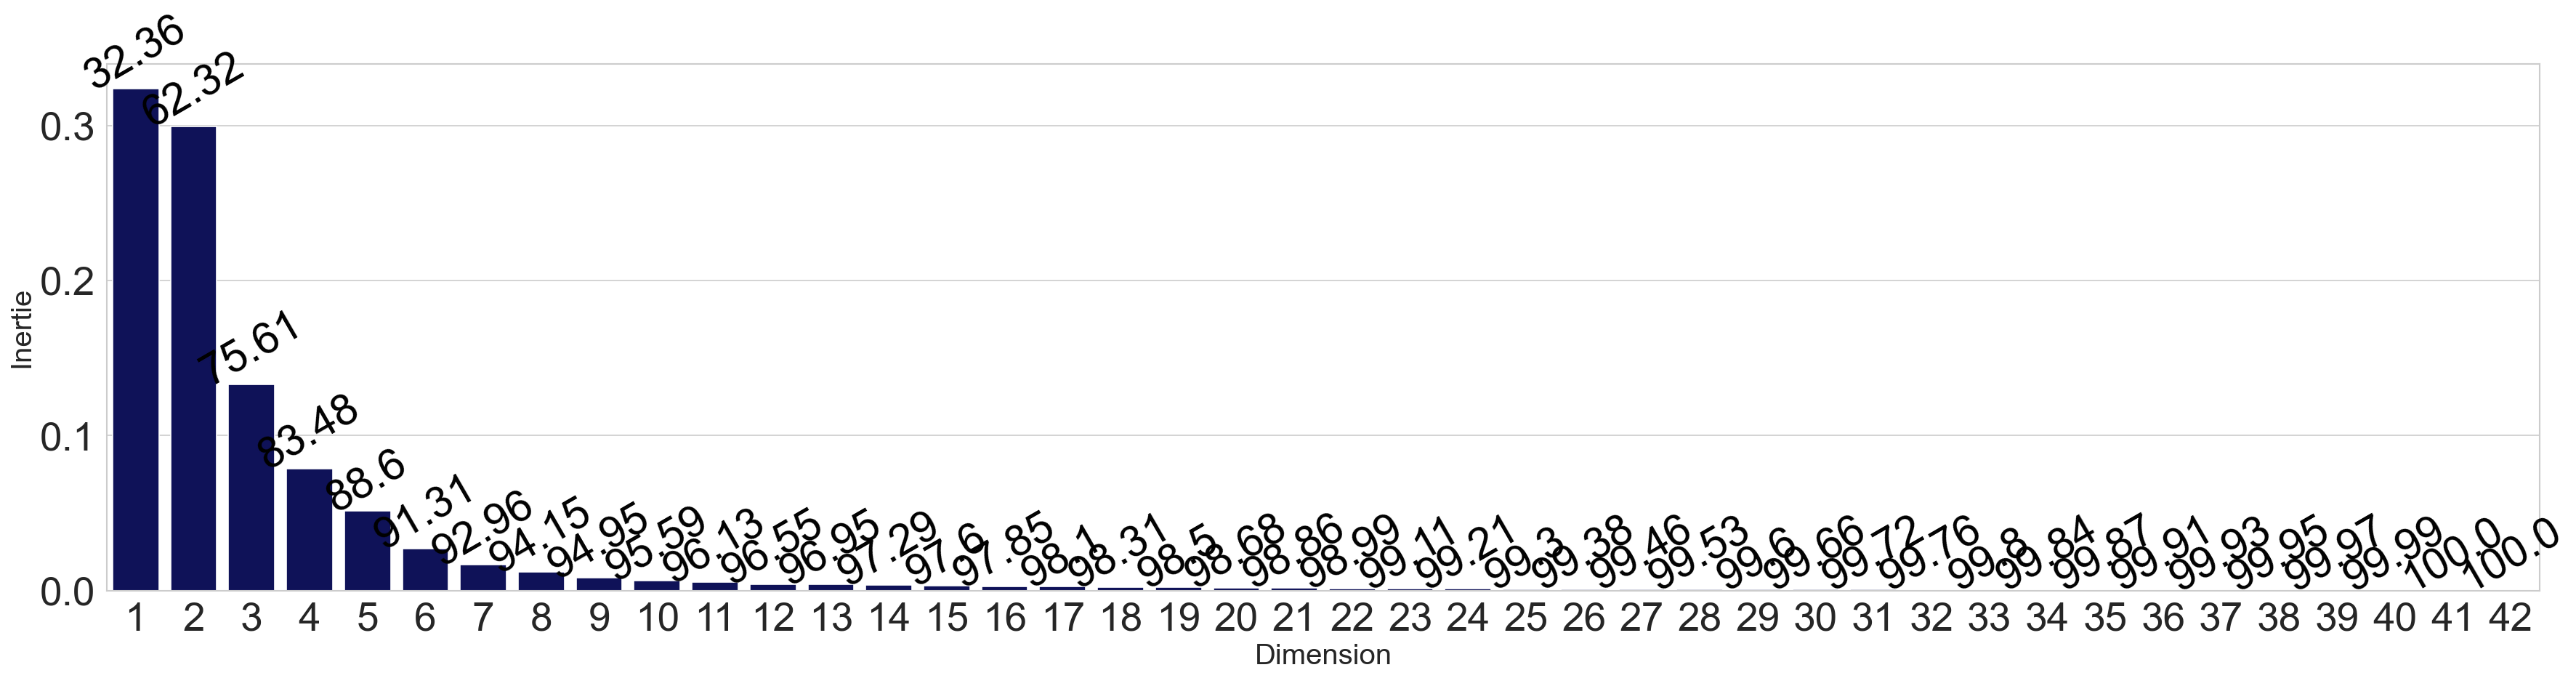

In [14]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font1 = fm.FontProperties(size=24)

inertie = pd.DataFrame(pca.explained_variance_ratio_,columns=['Inertie']) 
inertie['label'] = np.round(pca.explained_variance_ratio_.cumsum()*100,2)
inertie['Dimension'] = range(1,43)

plt.figure(figsize=(36,8),dpi=120)
sns.set_style("whitegrid")
g = sns.barplot(x="Dimension",y='Inertie', data=inertie, color="#030764")

for index, row in inertie.iterrows():
    g.text(row.name,row.Inertie, row.label, color='black', ha="center", rotation=30)
    
plt.xlabel('Dimension', fontproperties=font1)
plt.ylabel('Inertie', fontproperties=font1)

plt.show()

plt.style.use('seaborn-darkgrid')
sns.set(font_scale=2)

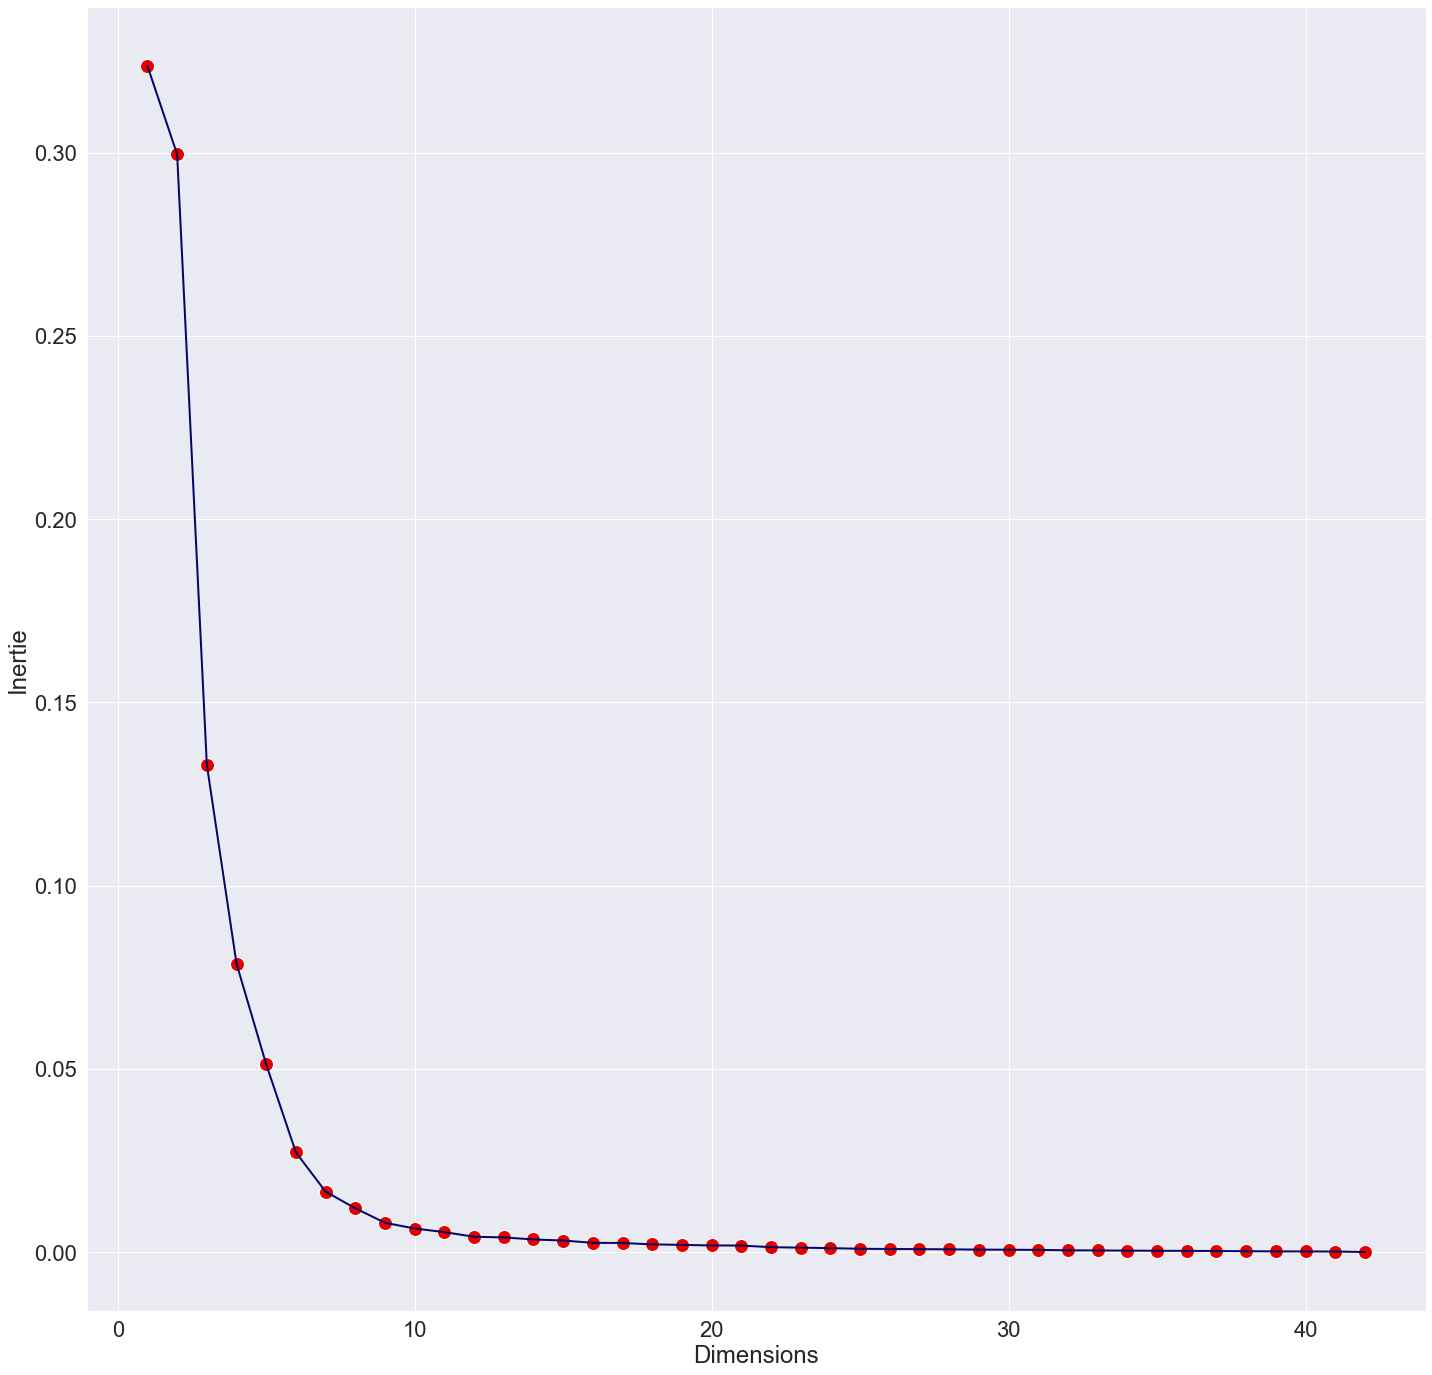

In [20]:
fig, ax = plt.subplots(figsize=(24,24));
graph = sns.lineplot( x='Dimension',
                      y='Inertie',
                      data=inertie,
                      estimator = None, 
                      lw        = 2, 
                      ci        = None,
                      color     = "#030764");
sns.scatterplot(x     = 'Dimension',
                y     = 'Inertie',
                data  = inertie,
                s     = 200,
                ci    = None, 
                color = "#e50000",
                ax    = graph);

ax.set_xlabel('Dimensions');
ax.set_ylabel('Inertie');

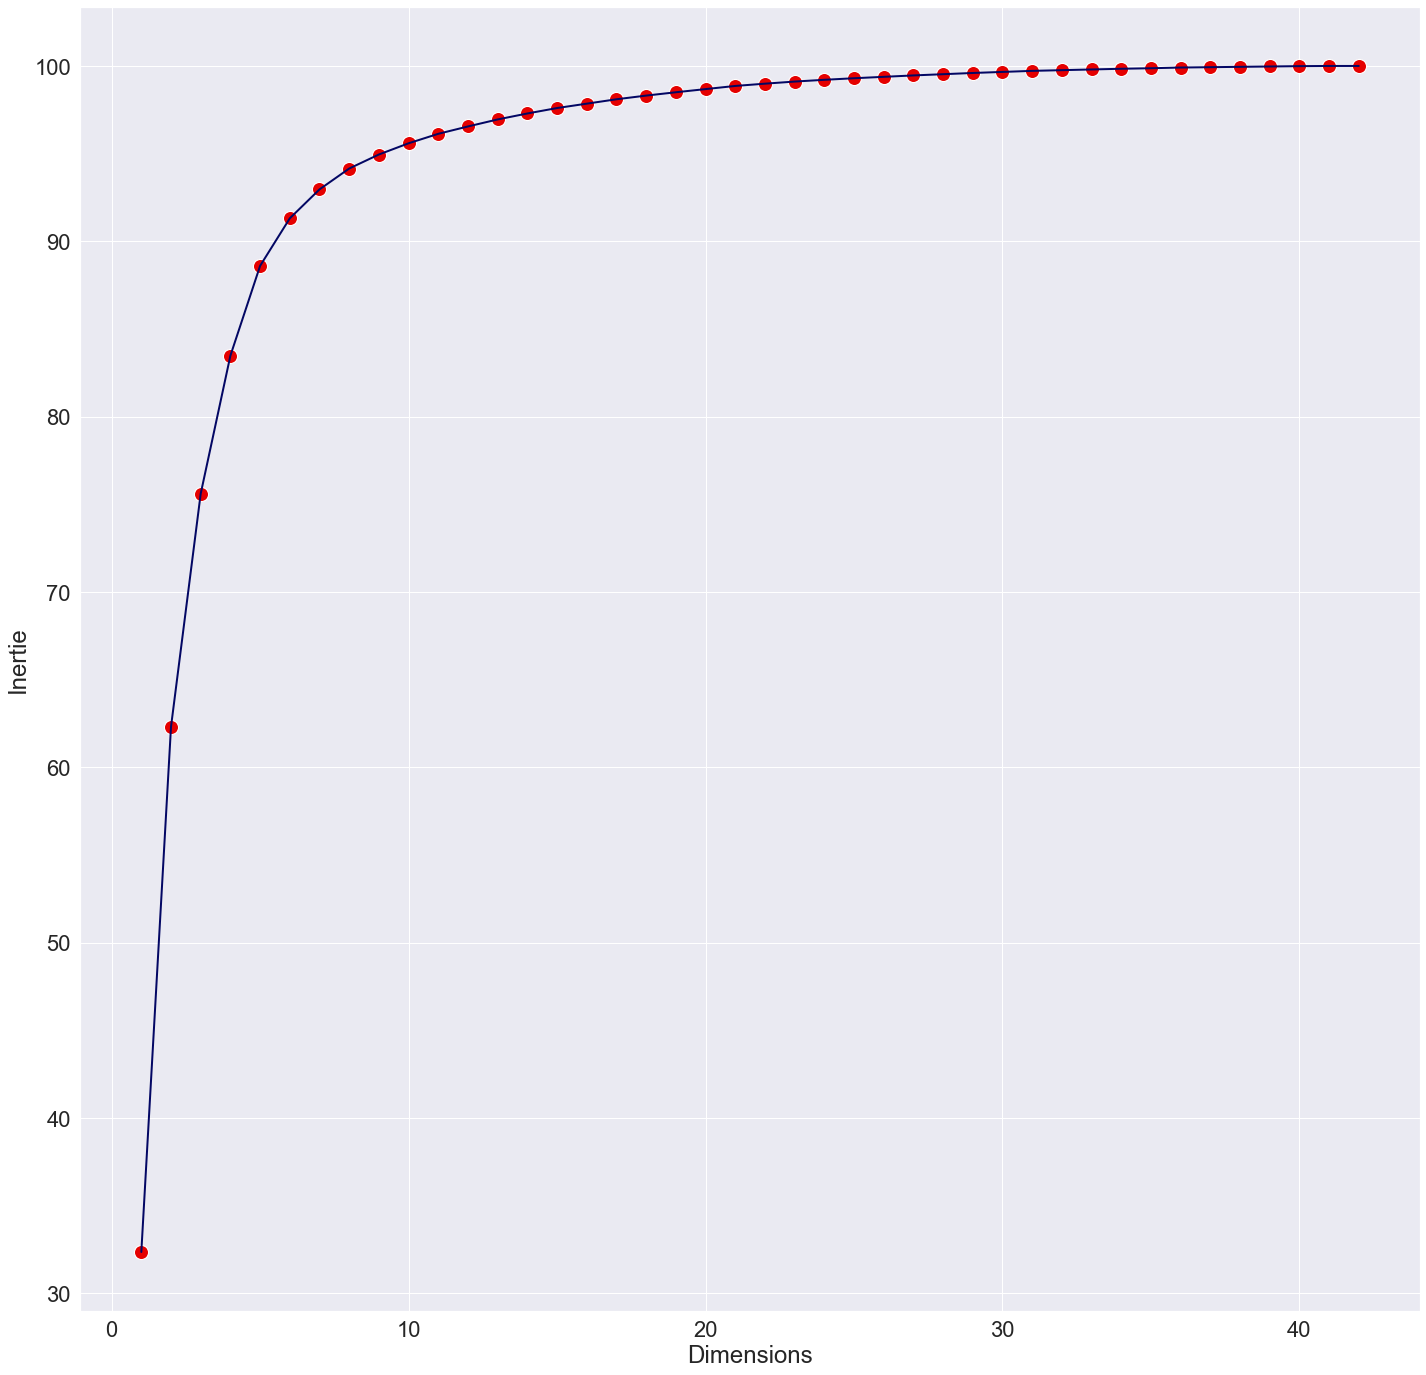

In [21]:
fig, ax = plt.subplots(figsize=(24,24));
graph = sns.lineplot( x='Dimension',
                      y='label',
                      data=inertie,
                      estimator = None, 
                      lw        = 2, 
                      ci        = None,
                      color     = "#030764");
sns.scatterplot(x     = 'Dimension',
                y     = 'label',
                data  = inertie,
                s     = 200,
                ci    = None, 
                color = "#e50000",
                ax    = graph);

ax.set_xlabel('Dimensions');
ax.set_ylabel('Inertie');

In [22]:
x = temperatures
from sklearn.preprocessing import StandardScaler,MinMaxScaler
modelStd = StandardScaler()
modelStd.fit(x)
x = modelStd.transform(x)

In [25]:
n_components = sum(pca.explained_variance_ratio_.cumsum() < .95 ) + 1 
from sklearn.decomposition import PCA
modelPCA = PCA(n_components=n_components)
x_proj = modelPCA.fit_transform(x)
donnees2d = pd.DataFrame(x_proj, index=temperatures.index, columns=['Dim{:02d}'.format(i+1) for i in range(n_components)])

In [27]:
n_components

10

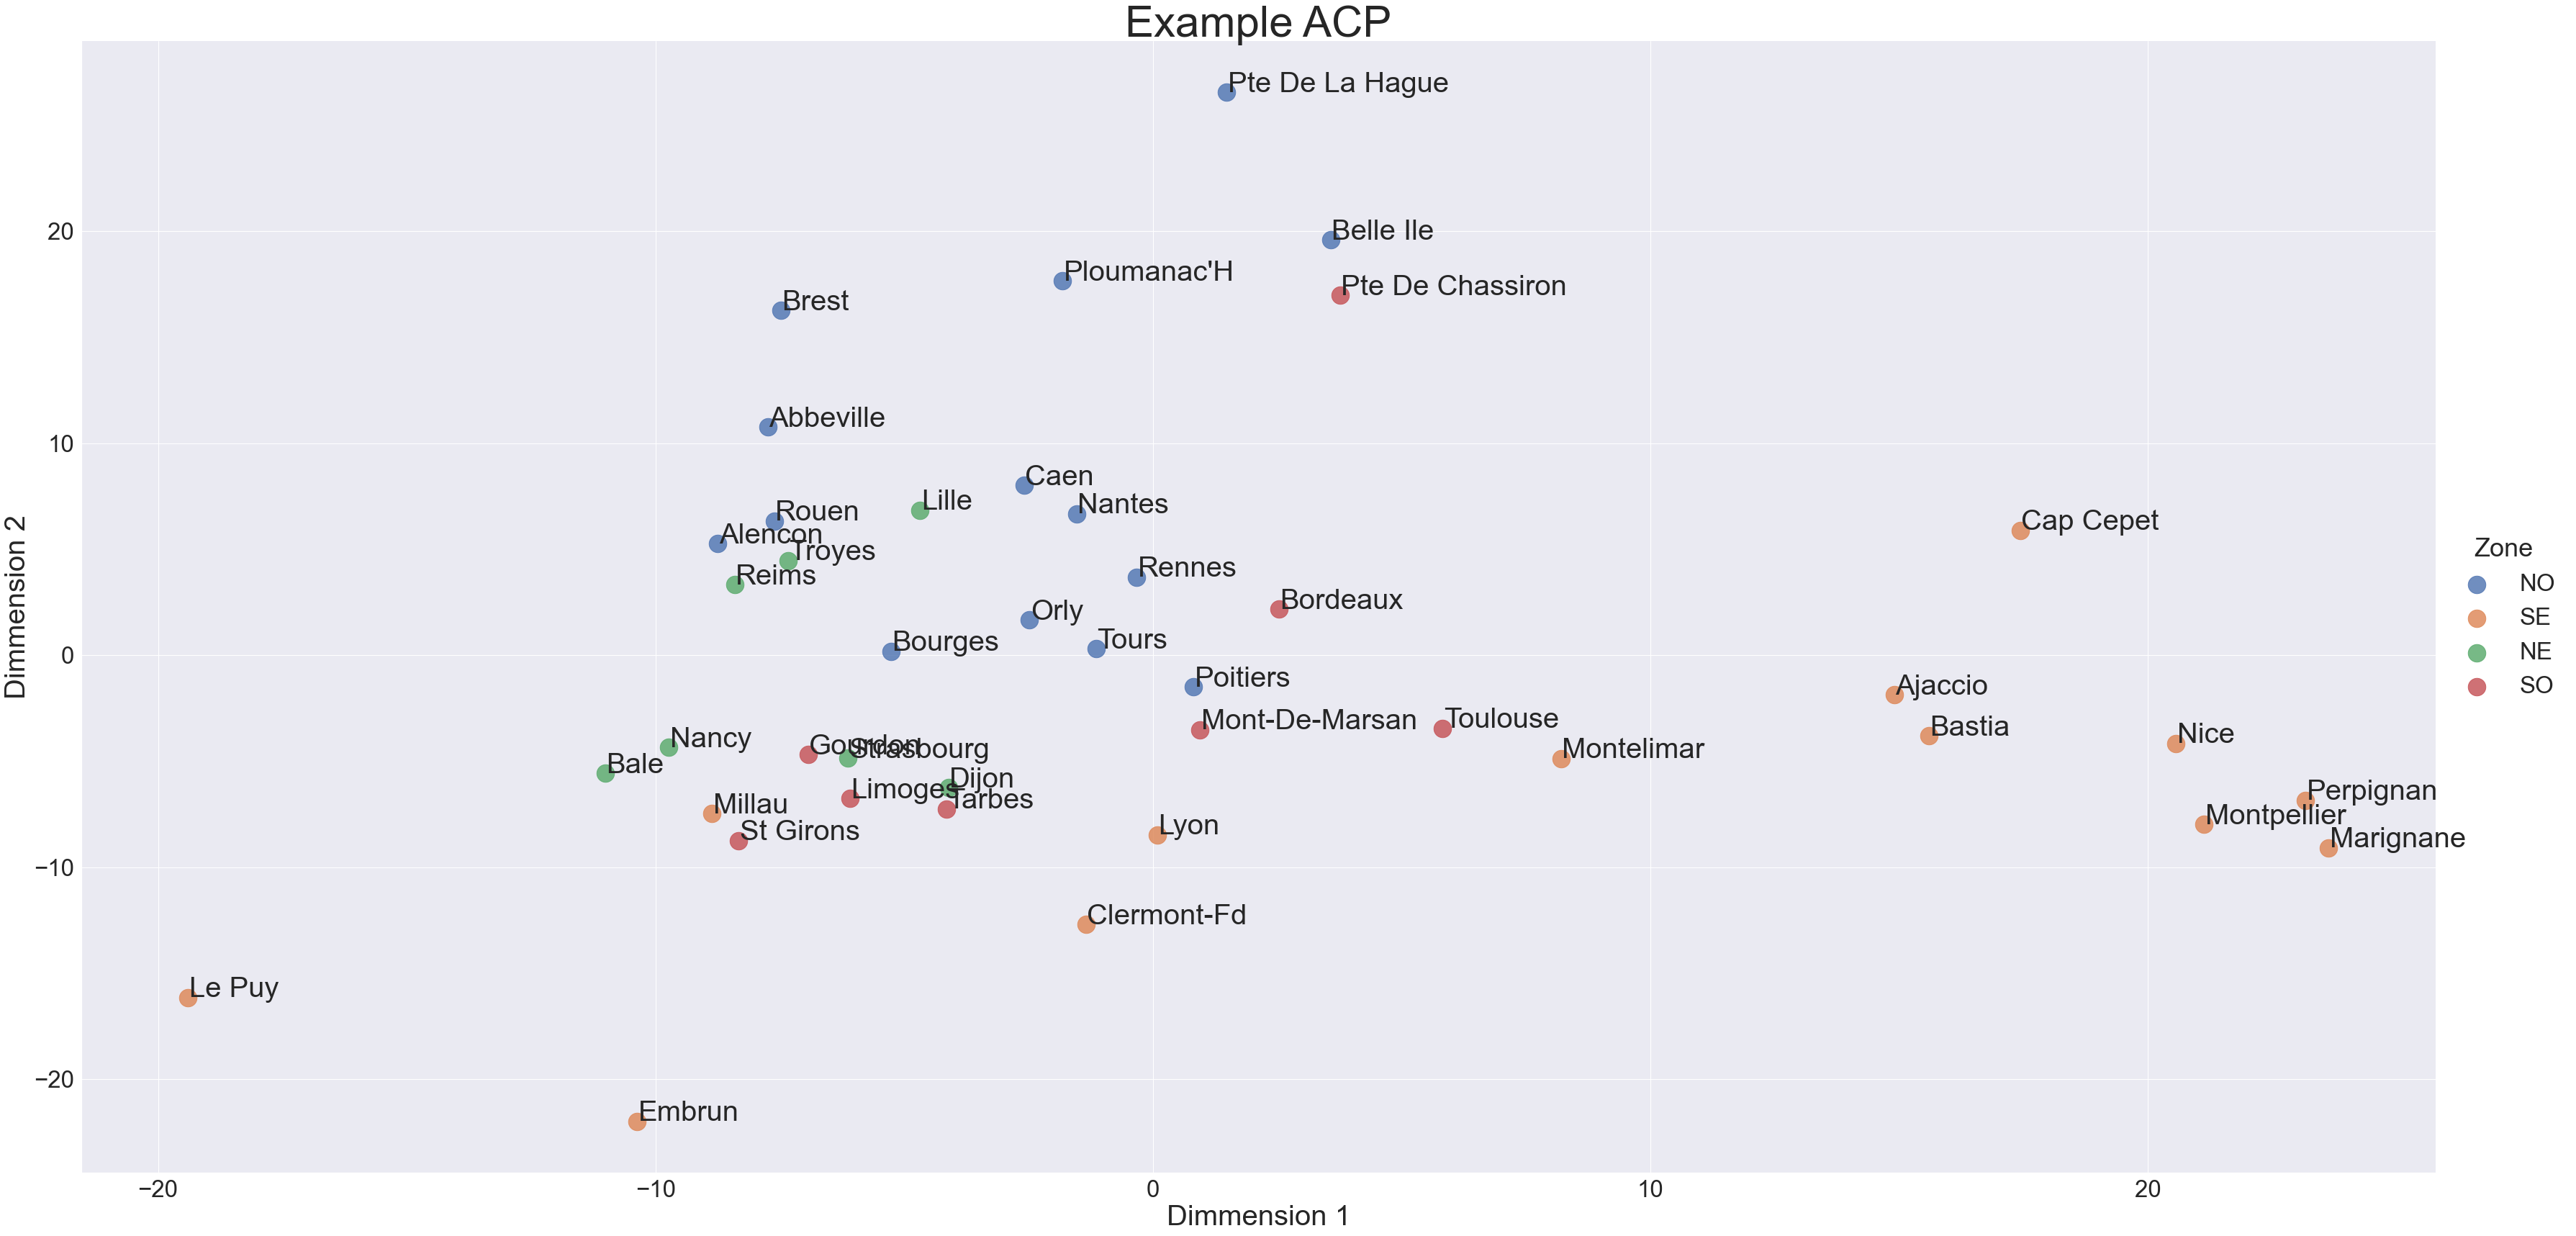

In [28]:
sns.set(font_scale=3)
ax = sns.lmplot(x='Dim01',y='Dim02', hue='Zone', 
                data=donnees2d.reset_index(), fit_reg=False, size = 24, aspect =2 ,scatter_kws={'s':600}) ;
font1 = fm.FontProperties(size=40)
font2 = fm.FontProperties(size=60)
plt.title('Example ACP', fontproperties=font2)
plt.xlabel('Dimmension 1', fontproperties=font1)
plt.ylabel('Dimmension 2', fontproperties=font1)


def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y']+.02, str(point['val']), 
                fontproperties=font1, rotation=0);

label_point(donnees2d.reset_index().Dim01, 
            donnees2d.reset_index().Dim02, 
            donnees2d.reset_index().Nom, plt.gca());
sns.set(font_scale=2)

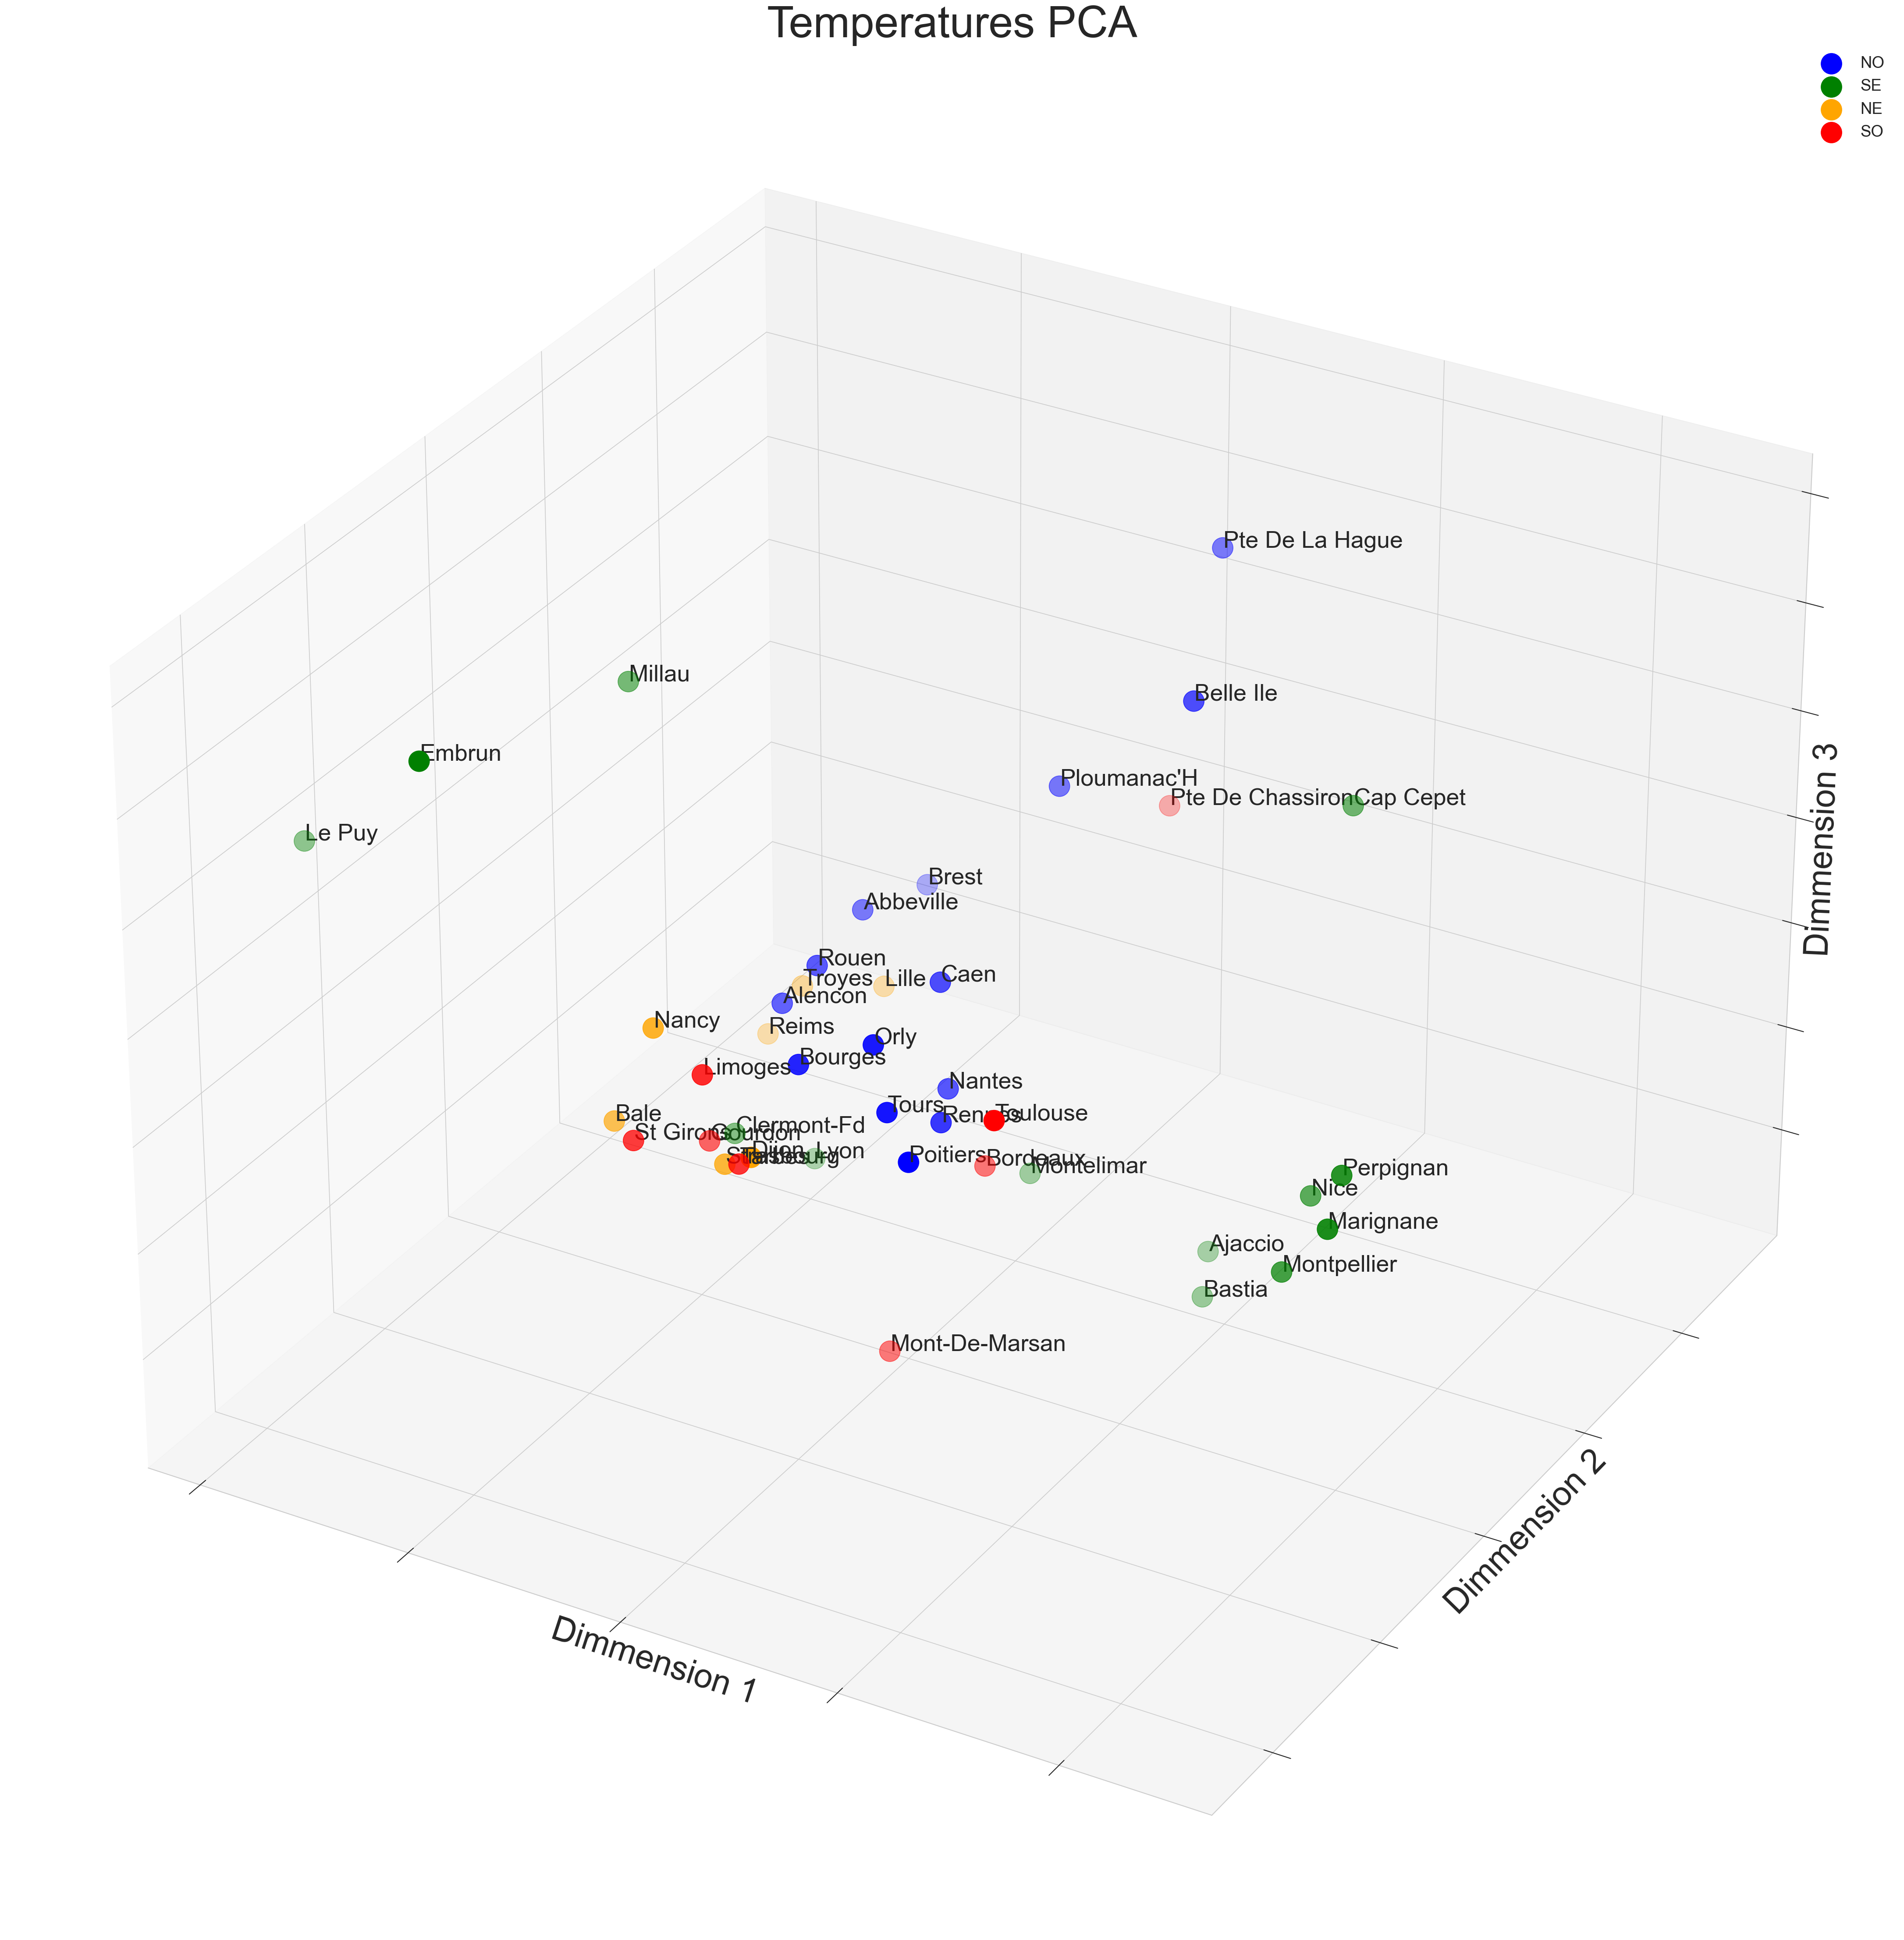

In [30]:
from mpl_toolkits.mplot3d import Axes3D
dfPCA = donnees2d.reset_index()

sns.set_style("whitegrid")
colors = { n:c for n,c in zip(dfPCA.Zone.unique(),['blue', 'green', 'orange', 'red'])}

dicoZone = {x:i for i,x in enumerate(dfPCA.Zone.unique())}
font1 = fm.FontProperties(size=32)

ax = Axes3D(plt.figure(figsize=(36,36),dpi=120));
ax.set_title('Temperatures PCA', size=60)

for i in dfPCA.Zone.unique():
    ax.scatter(dfPCA[dfPCA.Zone == i].Dim01,
               dfPCA[dfPCA.Zone == i].Dim02,
               dfPCA[dfPCA.Zone == i].Dim03,
               s=800,  
               c=colors[i],
               label = i);
    
def label_point(x, y, z, val, ax):
    a = pd.concat({'x': x, 'y': y,'z': z, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y']+.02, point['z']+.02, str(point['val']), 
                fontproperties=font1, rotation=30);

label_point(dfPCA.Dim01, dfPCA.Dim02, dfPCA.Dim03, dfPCA.Nom, plt.gca());


ax.set_xlabel('Dimmension 1', size=46)
ax.set_ylabel('Dimmension 2', size=46)
ax.set_zlabel('Dimmension 3', size=46)
ax.w_xaxis.set_ticklabels(())
ax.w_yaxis.set_ticklabels(())
ax.w_zaxis.set_ticklabels(())
plt.legend(loc='best')
plt.show()  

plt.style.use('seaborn-darkgrid')
sns.set(font_scale=2)

In [31]:
import plotly.express as px
import plotly.graph_objs as go

layout = go.Layout({"showlegend": False})

fig = px.scatter_3d(donnees2d.reset_index(), 
                    x='Dim01', 
                    y='Dim02', 
                    z='Dim03',
                    color='Zone',
#                     size=100+donnees3d.reset_index().Altitude,
#                     symbol=donnees.CD23.cat.codes,
                    text='Nom',
                    width=1024,
                    height=1024,
                   )

fig.show()